<a href="https://www.kaggle.com/code/alaaokaly/analysis-text-presentation-and-bow-tf-idf?scriptVersionId=195845550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inconsistent-and-consistent-amazon-reviews/amazon-reviews-org.csv


In [2]:
# imorting visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

from dateutil import parser
# NLP libraries 
import re
import nltk


import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('/kaggle/input/inconsistent-and-consistent-amazon-reviews/amazon-reviews-org.csv')
data = pd.DataFrame(data)
data.tail(15)

,reviewId,reviewDate,mainDepartment,subDepartment,productName,reviewTitle,reviewStar,reviewText,inconsistentStatus
72485,RACGG97KFPUWF,"Reviewed in the United States on August 20, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Very reusable,5.0,Very helpful for training. Thank you very much!,0
72486,REUXZ3LYF2EWL,"Reviewed in the United States on August 19, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,VERY COMFORTABLE YOGA MAT,5.0,This thick yoga mat makes it very easy to go i...,0
72487,RT8DYEADR2YJG,"Reviewed in the United States on August 16, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Comfort,5.0,Stability,1
72488,R1K8PIJNKP8YP4,"Reviewed in the United States on August 16, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Good Cushion,5.0,I bought this one to create a double layer (I ...,0
72489,R1YUPJ8QR8ESPX,"Reviewed in the United States on August 15, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Very fit😃,5.0,It is a perfect fit and easy to carry whenever...,0
72490,R1IDCJU7Q884IN,"Reviewed in the United States on August 14, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Extra cushion,5.0,This is just the yoga mat I have been looking ...,0
72491,R23ZCOQ2FK4T2H,"Reviewed in the United States on August 14, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,One of the best buys ive made on AMAZON!,5.0,My child uses it for a playmate as well as for...,0
72492,R3ZCSBMSHNZJV,"Reviewed in the United States on August 11, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Thick and comfortable!,5.0,Best Matt I've ever owned.,0
72493,R170Y9LPITL8UE,"Reviewed in the United States on August 11, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Easy to roll up and very comfortable to work o...,5.0,Very durable and comfortable,0
72494,R1M5SB6GY7URLJ,"Reviewed in the United States on August 10, 2021",Sports and Outdoors,Sports & Fitness,Amazon Basics Extra Thick Exercise Yoga Gym Fl...,Good mat,5.0,Thick and provides back protection,1


In [4]:
data.shape

(72500, 9)

In [5]:
data.columns

Index(['reviewId', 'reviewDate', 'mainDepartment', 'subDepartment',
       'productName', 'reviewTitle', 'reviewStar', 'reviewText',
       'inconsistentStatus'],
      dtype='object')

In [6]:
data = data.dropna(subset=['reviewText']) # the target column 
data.isnull().sum()

reviewId               0
reviewDate             0
mainDepartment         0
subDepartment          0
productName            0
reviewTitle           18
reviewStar             0
reviewText             0
inconsistentStatus     0
dtype: int64

In [7]:
data['reviewId'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
72495    False
72496    False
72497    False
72498    False
72499    False
Name: reviewId, Length: 72493, dtype: bool

In [8]:


def extract_date(text):
    # Define a regular expression pattern to match dates
    pattern = re.compile(r'\b(\w+ \d{1,2}, \d{4})\b')
    match = pattern.search(text)
    if match:
        date_str = match.group(1)
        date = parser.parse(date_str)
        return date.strftime('%Y-%m-%d')  
data['reviewDate'] = data['reviewDate'].apply(extract_date)      
data['reviewDate'] = pd.to_datetime(data['reviewDate'])


In [9]:
data.subDepartment.unique()

array(['Foot,Hand & Nail Care', 'Fragrance', 'Hair Care', 'Makeup',
       'Shave & Hair Removal', 'Skin Care',
       'Computer Accessories & Peripherals', 'Computers & Tablets',
       'Data Storage', 'Laptop Accessories', 'Networking Products',
       'Camera and Accessories', 'CellPhones and Accessories',
       'GPS and Navigation', 'Headphones', 'Video games and accessories',
       'Bath', 'Beds', 'Furniture', 'Heating, Cooling & Air Quality',
       'Kitchen and Dining', "Men's Accessories", "Men's Clothing",
       "Men's Shoes", "Men's Watches", 'Outdoor Recreation',
       'Sports & Fitness'], dtype=object)

In [10]:
data.mainDepartment.unique()

array(['Beauty and Personal Care', 'Computers', 'Electronics',
       'Home and Kitchen', 'Sports and Outdoors'], dtype=object)

In [11]:
data_dep = data.groupby(['mainDepartment', 'subDepartment']).size().reset_index(name='Count')
data_dep.head(5)

,mainDepartment,subDepartment,Count
0,Beauty and Personal Care,"Foot,Hand & Nail Care",2500
1,Beauty and Personal Care,Fragrance,2498
2,Beauty and Personal Care,Hair Care,2499
3,Beauty and Personal Care,Makeup,2500
4,Beauty and Personal Care,Shave & Hair Removal,2500


In [12]:
fig = px.treemap(data_dep, path=['mainDepartment', 'subDepartment'], values='Count', color='mainDepartment', 
                 color_continuous_scale='Viridis')
fig.update_layout(title='Sub departments in each main department')
fig.show()

In [13]:
data['reviewStar'].mean()

2.9998896445174017

In [14]:
def star_to_label(star):
    if star < 3:
        return 'negative'
    else:
        return 'positive'
data['label'] = data['reviewStar'].apply(star_to_label)

In [15]:
value_counts = data['reviewStar'].value_counts()
value_counts

reviewStar
1.0    14500
2.0    14500
3.0    14499
5.0    14498
4.0    14496
Name: count, dtype: int64

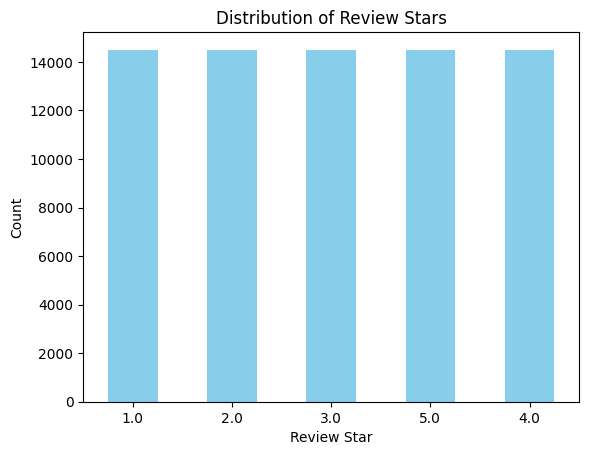

In [16]:
value_counts = data['reviewStar'].value_counts()


value_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Review Stars')
plt.xlabel('Review Star')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed

# Show plot
plt.show()

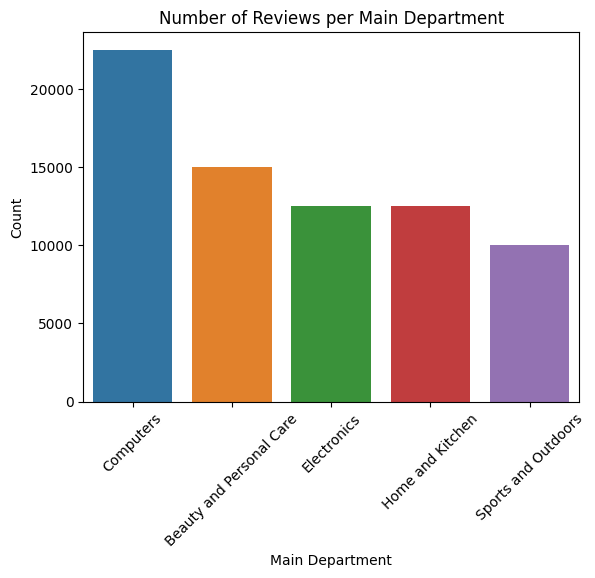

In [17]:
sns.countplot(data=data, x='mainDepartment', order=data['mainDepartment'].value_counts().index)
plt.title('Number of Reviews per Main Department')
plt.xlabel('Main Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter





In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
data['combinedReview'] = data['reviewTitle'] + ' ' + data['reviewText'].fillna('')

# Define the text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stop_words]  
    words = [stemmer.stem(word) for word in words]
    words =  [word for word in words if re.match(r'^[a-zA-Z]+$', word)]
   # Remove stopwords
    
    return ' '.join(words)  
data['Text'] = data['combinedReview'].fillna('').apply(clean_text)

# Drop unnecessary columns
data = data.drop(columns=['reviewTitle', 'reviewText','combinedReview'])

data['Text'] = data['Text'].astype(str)


In [20]:
print('and' in stop_words)

True


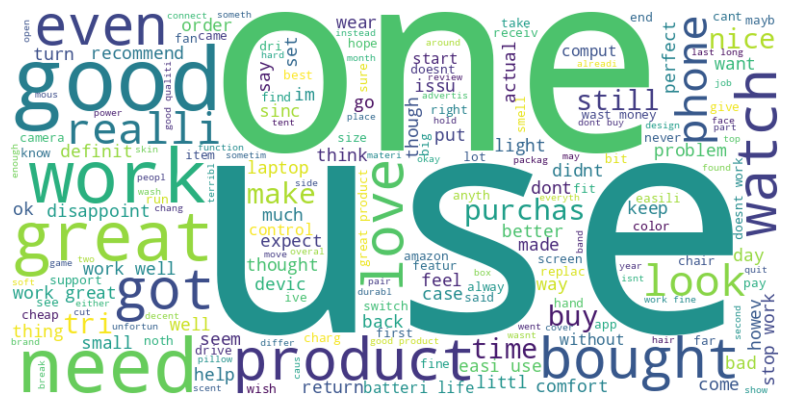

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Text'].astype(str)))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.show()

In [22]:
grouped_date = data.groupby(['reviewDate', 'mainDepartment']).size().reset_index(name='Count')
grouped_date

,reviewDate,mainDepartment,Count
0,2008-11-30,Computers,1
1,2009-07-27,Computers,1
2,2010-01-24,Computers,1
3,2010-02-16,Computers,1
4,2010-02-21,Computers,1
...,...,...,...
7111,2021-09-06,Electronics,16
7112,2021-09-07,Computers,148
7113,2021-09-07,Electronics,2
7114,2021-09-08,Computers,80


In [23]:
department_totals = grouped_date.groupby('mainDepartment').agg({'Count': 'sum'}).reset_index()

fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(x=department_totals['mainDepartment'],
                     y=department_totals['Count'],
                     name='Total Reviews'))

# Update layout
fig.update_layout(title='Total Number of Reviews by Department',
                  xaxis_title='Department',
                  yaxis_title='Total Reviews')

# Show the plot
fig.show()

In [24]:
fig = go.Figure()

# Add pie chart trace
fig.add_trace(go.Pie(labels=department_totals['mainDepartment'],
                     values=department_totals['Count'],
                     name='Department Reviews'))

# Update layout
fig.update_layout(title='Proportion of Reviews by Department')

# Show the plot
fig.show()

In [25]:
monthly_data = grouped_date.groupby([grouped_date['reviewDate'].dt.to_period('M'), 'mainDepartment']).agg({'Count': 'sum'}).reset_index()
monthly_data['reviewDate'] = monthly_data['reviewDate'].astype(str)
departments = monthly_data['mainDepartment'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black']

# Iterate over each department and create a separate figure
for i, department in enumerate(departments):
    department_data = monthly_data[monthly_data['mainDepartment'] == department]
    
    # Create a new figure for each department
    fig = go.Figure()
    
    # Add a line trace for the department
    fig.add_trace(go.Scatter(
        x=department_data['reviewDate'],
        y=department_data['Count'],
        mode='lines+markers',
        name=department,
        line=dict(color=colors[i % len(colors)])
    ))
    
    # Update layout
    fig.update_layout(
        title=f'Monthly Review Counts for {department}',
        xaxis_title='Date',
        yaxis_title='Number of Reviews',
        xaxis=dict(tickformat='%Y-%m', title='Month-Year'),
        template='plotly_white'
    )
    
    # Show the plot
    fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



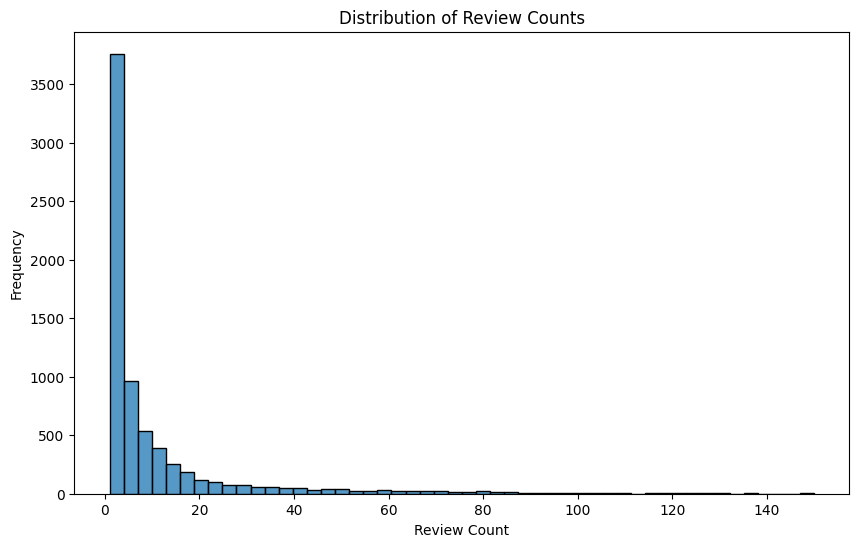

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(grouped_date['Count'], bins=50, kde=False)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

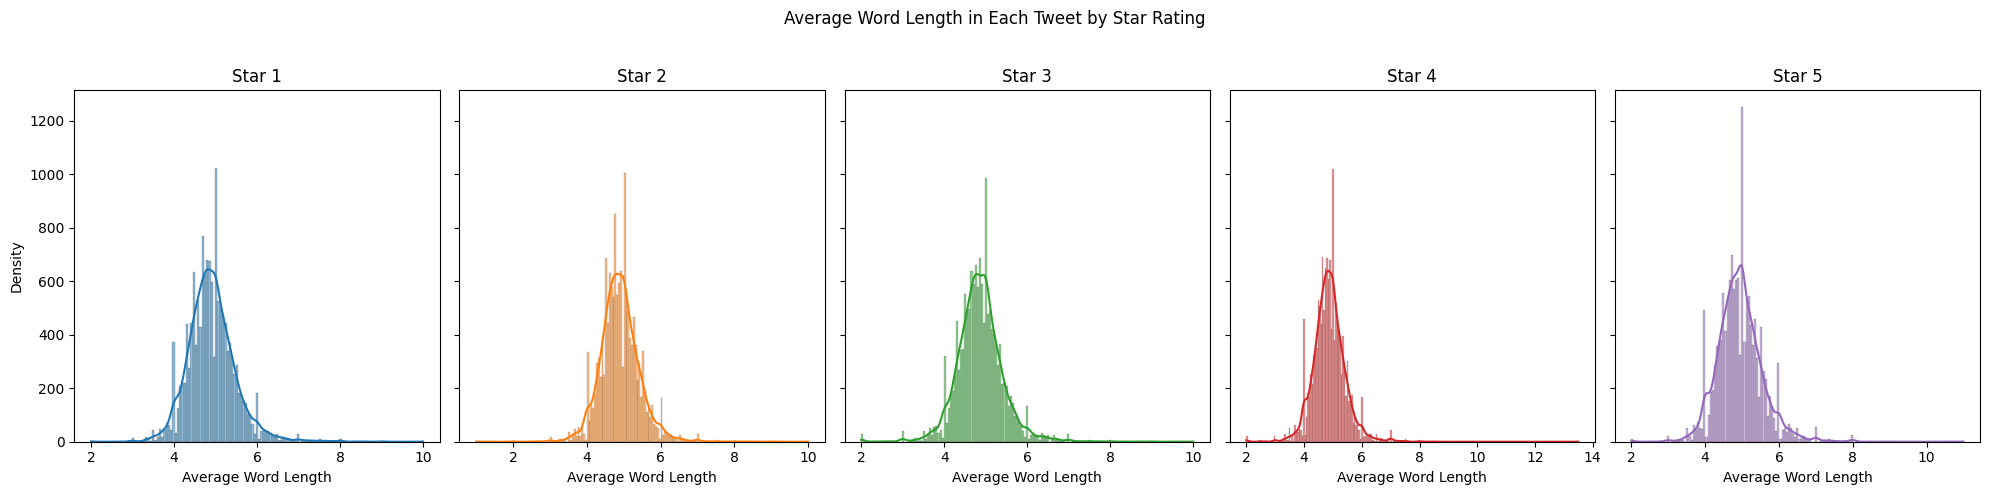

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over each star rating from 1 to 5
for star in range(1, 6):
    # Filter tweets for the current star rating
    word = data[data['reviewStar'] == star]['Text'].str.split().apply(lambda x: [len(i) for i in x])
    
    # Calculate average word length for each tweet
    avg_word_length = word.map(lambda x: np.mean(x) if len(x) > 0 else np.nan)
    
    # Plot the distribution
    sns.histplot(avg_word_length.dropna(), kde=True, ax=axes[star-1], color=sns.color_palette("tab10")[star-1])
    
    # Set the title and labels
    axes[star-1].set_title(f'Star {star}')
    axes[star-1].set_xlabel('Average Word Length')
    axes[star-1].set_ylabel('Density')

# Set a main title for the figure
fig.suptitle('Average Word Length in Each Tweet by Star Rating')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

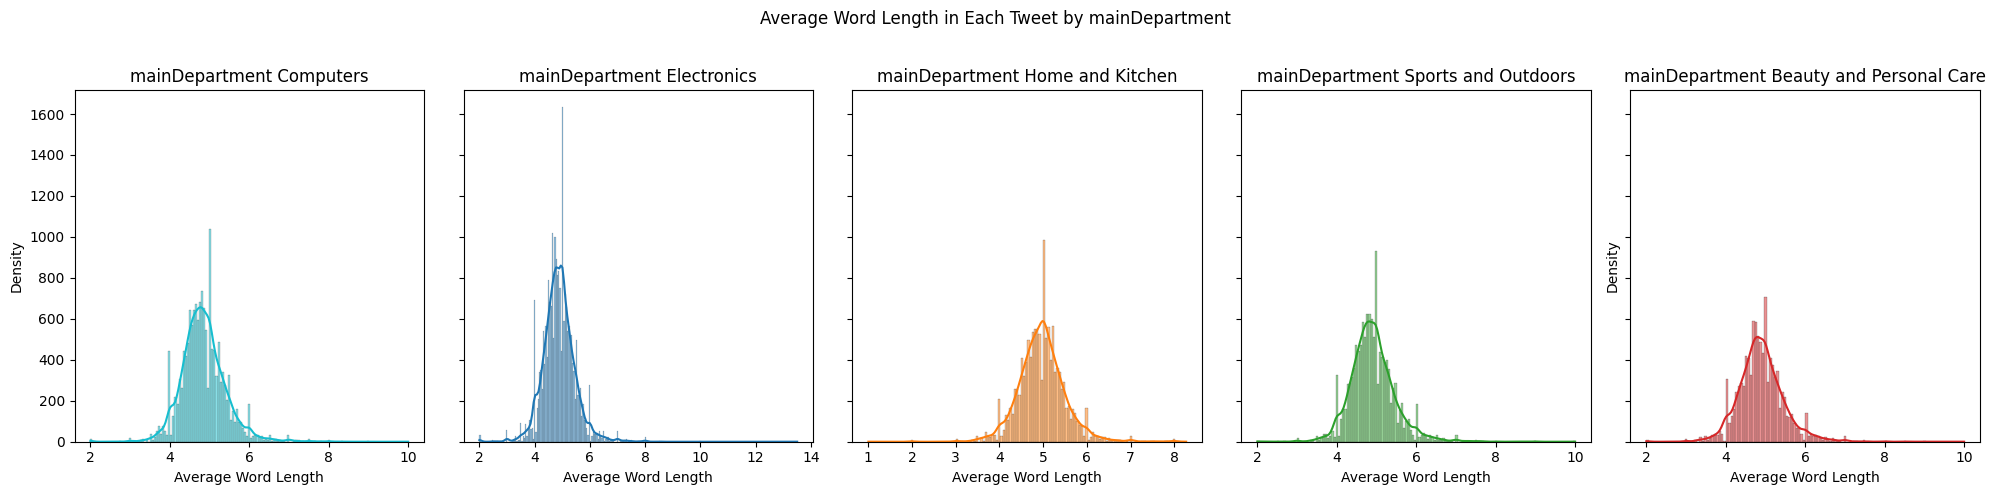

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over each star rating from 1 to 5
for i,star in enumerate ( data['mainDepartment'].unique()):
    # Filter tweets for the current star rating
    word = data[data['mainDepartment'] == star]['Text'].str.split().apply(lambda x: [len(i) for i in x])
    
    # Calculate average word length for each tweet
    avg_word_length = word.map(lambda x: np.mean(x) if len(x) > 0 else np.nan)
    
    # Plot the distribution
    sns.histplot(avg_word_length.dropna(), kde=True, ax=axes[i], color=sns.color_palette("tab10")[i-1])
    
    # Set the title and labels
    axes[i-1].set_title(f'mainDepartment {star}')
    axes[i-1].set_xlabel('Average Word Length')
    axes[i-1].set_ylabel('Density')

# Set a main title for the figure
fig.suptitle('Average Word Length in Each Tweet by mainDepartment')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

In [29]:
data.columns


Index(['reviewId', 'reviewDate', 'mainDepartment', 'subDepartment',
       'productName', 'reviewStar', 'inconsistentStatus', 'label', 'Text'],
      dtype='object')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the BoW model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Text'])

# Convert to DataFrame for easier inspection
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [31]:
word_counts = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Sort and prepare data for Plotly
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
words, counts = zip(*sorted_word_freq)

# Create bar chart with Plotly
fig = go.Figure(data=[go.Bar(x=words[:50], y=counts[:20], marker_color='royalblue')])

fig.update_layout(
    title='Top 50 Words by Frequency',
    xaxis_title='Words',
    yaxis_title='Frequency',
    xaxis_tickangle=-45
)

fig.show()

In [32]:
X = data['Text']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Initialize a pipeline with Bag of Words and Naive Bayes classifier
model_bow = Pipeline([
    ('vectorizer', CountVectorizer()),  # Bag of Words
    ('classifier', MultinomialNB())     # Naive Bayes
])

# Train the model
model_bow.fit(X_train, y_train)

# Make predictions
y_pred_bow = model_bow.predict(X_test)

# Evaluate the model
print("Bag of Words Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Classification Report:\n", classification_report(y_test, y_pred_bow))

Bag of Words Model:
Accuracy: 0.7860492918889094
Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.69      0.72      8763
    positive       0.80      0.85      0.83     12985

    accuracy                           0.79     21748
   macro avg       0.78      0.77      0.77     21748
weighted avg       0.78      0.79      0.78     21748



In [34]:
vectorizer = model_bow.named_steps['vectorizer']
classifier = model_bow.named_steps['classifier']
feature_names = vectorizer.get_feature_names_out()
log_probs = classifier.feature_log_prob_
class_probs = np.exp(log_probs)

# Create a DataFrame for easy manipulation
df = pd.DataFrame(class_probs.T, index=feature_names, columns=['negative', 'positive'])
df_sorted = df.sort_values(by=['negative','positive'], ascending=False)
# Get top 20 words for each class
top_words_negative = df['negative'].nlargest(30)
top_words_positive = df['positive'].nlargest(30)

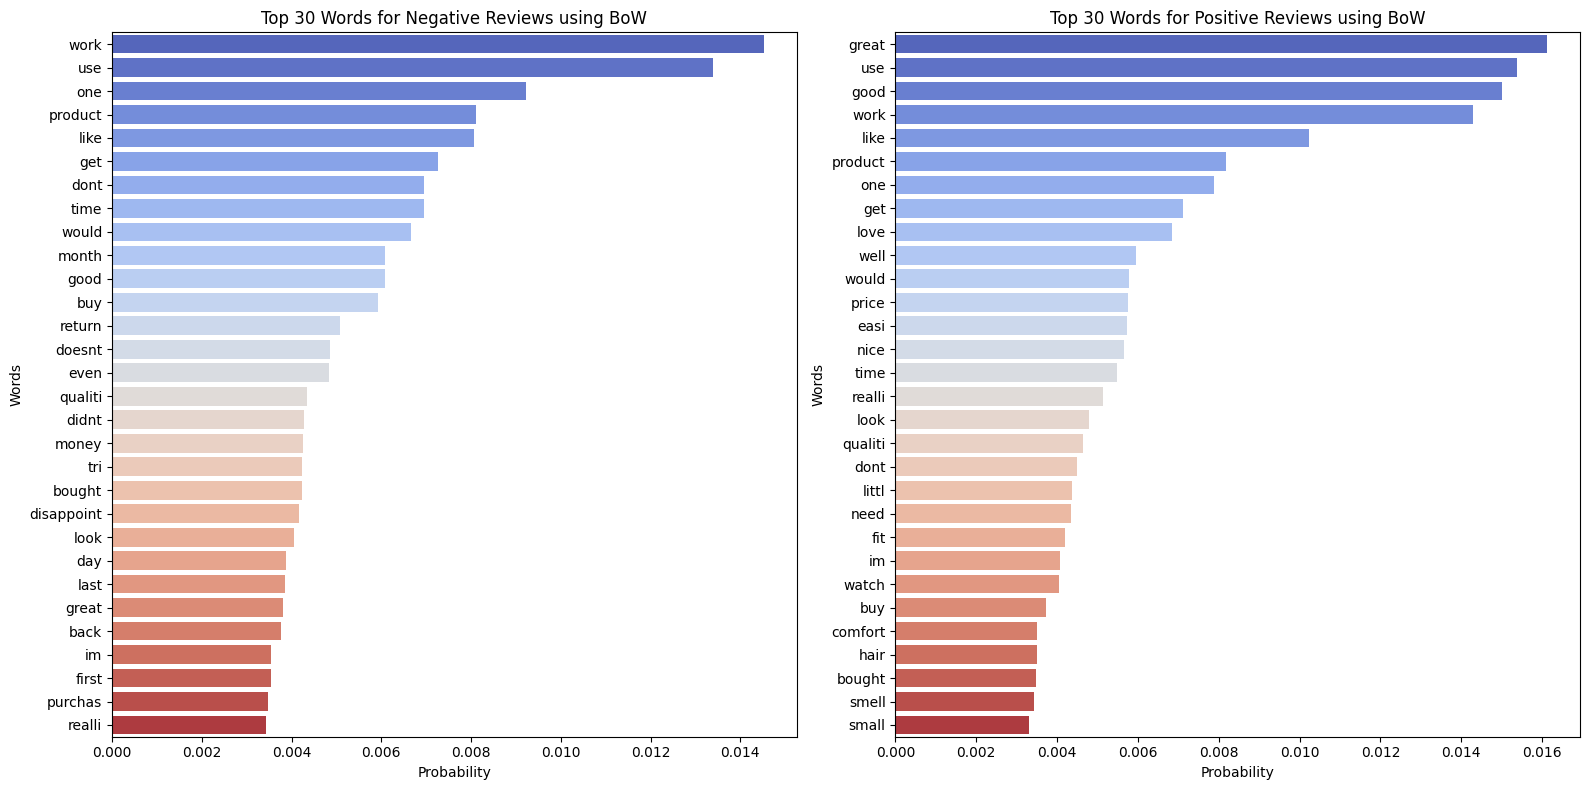

In [35]:


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot top words for negative class
sns.barplot(x=top_words_negative.values, y=top_words_negative.index, palette='coolwarm', ax=axes[0])
axes[0].set_title('Top 30 Words for Negative Reviews using BoW')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Words')

# Plot top words for positive class
sns.barplot(x=top_words_positive.values, y=top_words_positive.index, palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 30 Words for Positive Reviews using BoW')
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Words')

# Adjust layout
plt.tight_layout()
plt.show()




In [36]:
df[:10]

,negative,positive
aa,0.000013,0.000027
aaa,0.000008,0.000017
aaaaand,0.000002,0.000003
aan,0.000002,0.000003
aand,0.000004,0.000003
ab,0.000013,0.000006
aback,0.000004,0.000002
abandon,0.000008,0.000003
abat,0.000004,0.000002
abbrevi,0.000004,0.000003


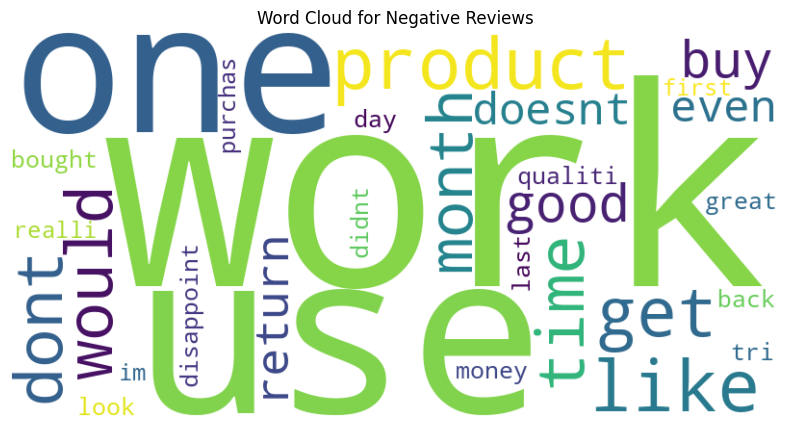

In [37]:
# Generate word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_negative)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


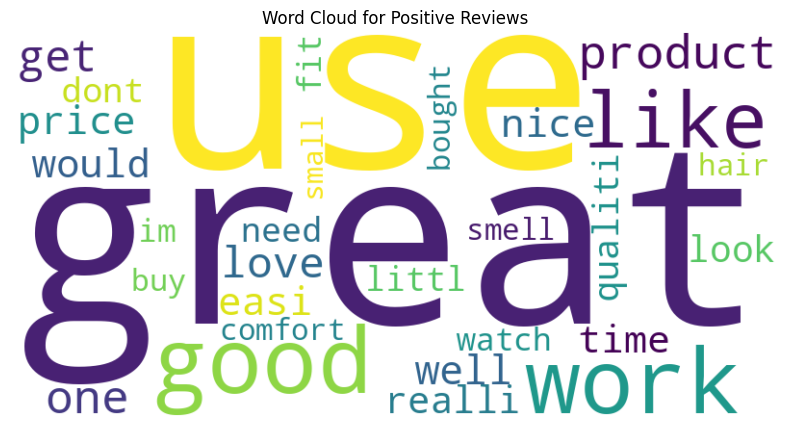

In [38]:
# Generate word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_positive)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [39]:
model_tfidf = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TF-IDF
    ('classifier', MultinomialNB())     # Naive Bayes
])

# Train the model
model_tfidf.fit(X_train, y_train)

# Make predictions
y_pred_tfidf = model_tfidf.predict(X_test)

# Evaluate the model
print("TF-IDF Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

TF-IDF Model:
Accuracy: 0.7549659738826558
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.49      0.62      8763
    positive       0.73      0.93      0.82     12985

    accuracy                           0.75     21748
   macro avg       0.78      0.71      0.72     21748
weighted avg       0.77      0.75      0.74     21748



In [40]:
vectorizer = model_tfidf.named_steps['vectorizer']
classifier = model_tfidf.named_steps['classifier']

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the log probabilities of features for each class
log_probs = classifier.feature_log_prob_

# Convert log probabilities to probabilities
class_probs = np.exp(log_probs)

# Create a DataFrame for easy manipulation
df = pd.DataFrame(class_probs.T, index=feature_names, columns=['negative', 'positive'])


top_words_negative = df['negative'].nlargest(30)
top_words_positive = df['positive'].nlargest(30)

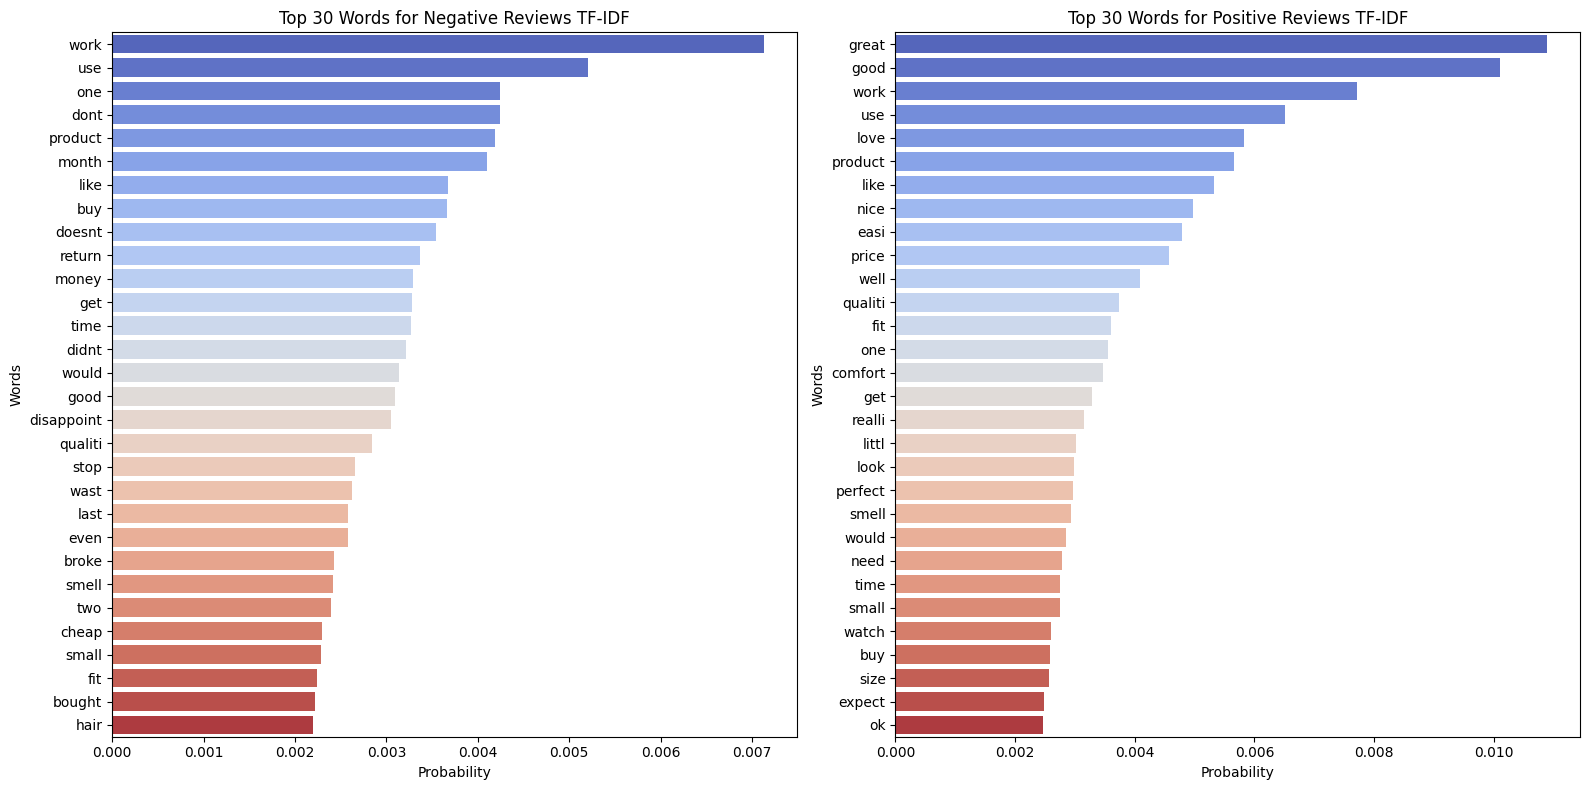

In [41]:


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot top words for negative class
sns.barplot(x=top_words_negative.values, y=top_words_negative.index, palette='coolwarm', ax=axes[0])
axes[0].set_title('Top 30 Words for Negative Reviews TF-IDF')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Words')

# Plot top words for positive class
sns.barplot(x=top_words_positive.values, y=top_words_positive.index, palette='coolwarm', ax=axes[1])
axes[1].set_title('Top 30 Words for Positive Reviews TF-IDF')
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Words')

# Adjust layout
plt.tight_layout()
plt.show()



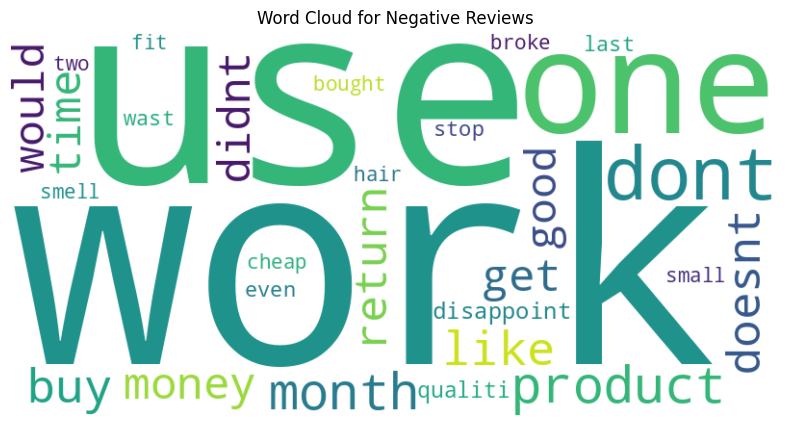

In [42]:
# Generate word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_negative)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


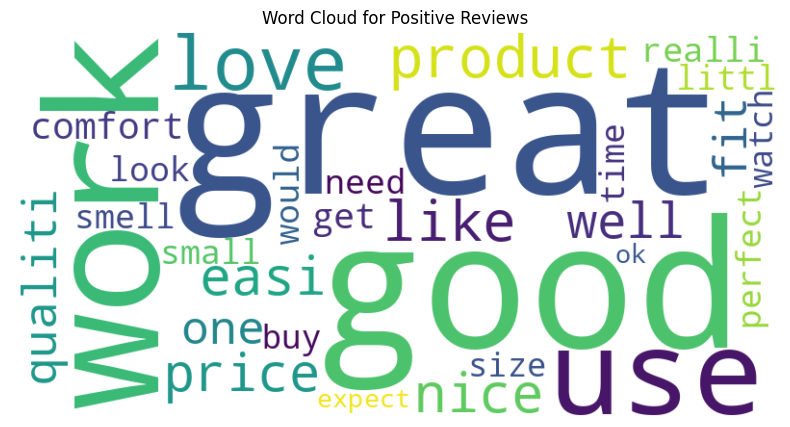

In [43]:

# Generate word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_positive)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()